<a href="https://colab.research.google.com/github/toluwee/Machine_Learning_Projects/blob/master/Handwritten_Digit_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition using TensorFlow with and without Convolutions

---



### About dataset
The MNIST database of handwritten digits, available from http://yann.lecun.com/exdb/mnist/index.html and included in Keras dataset. It is a subset of a larger set available from NIST. The set of images in the MNIST database is a combination of two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 and Special Database 3 consist of digits written by high school students and employees of the United States Census Bureau, respectively. The digits have been size-normalized and centered in a fixed-size image.


MNIST dataset has the following features:
*   Dataset has a training set of 60,000 examples, and a test set of 10,000 examples.
*   The size of each image is 28x28 pixels.
*   Each image has only 1 color channel, i.e., grayscale image.
*   Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.
*   Each image is labeled from 0-9.




## Objective 

1. To correctly identify digits from a dataset of tens of thousands of handwritten images.
2. To compare the results of the generated model with and without using CNN and CNN

## Methodology

### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import dataset
Load MNIST data from tf.keras datasets API

In [2]:
 mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Load the data into two sets of lists

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

### Exploratory Analysis
 

Next we visualize the input digits by plotting images. 

0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 

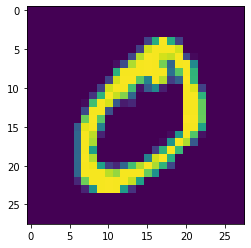

In [4]:
np.set_printoptions(linewidth=200) #These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
plt.imshow(training_images[1]) #Display data as an image; i.e. on a 2D regular raster
print(training_labels[1])
print(training_images[1])


This will plot the first 30 images of digits with the label.

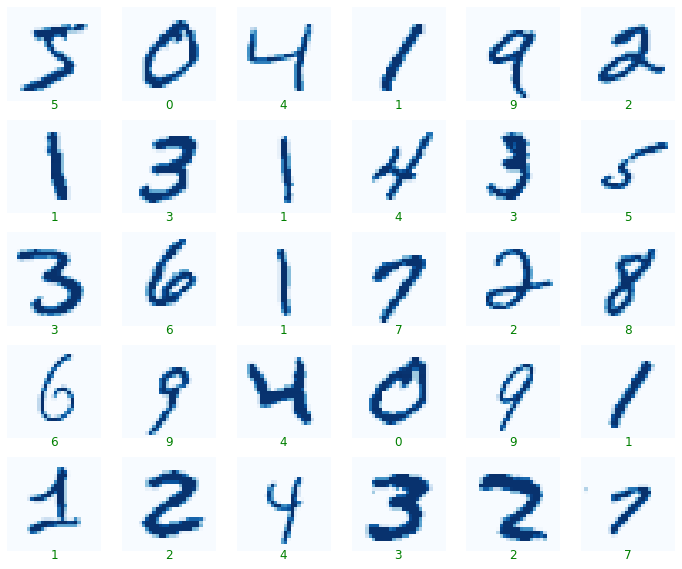

In [5]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(training_images[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(training_labels[i]), y=-0.15,color="green")
plt.savefig("digits.png")

### Pre-processing

First we reshape the images to 4D   

In [6]:
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

Now, we normalize the values 

*Important to only normalize the training and testing images, not the labels!*

In [7]:
training_images = training_images / 255.0
test_images = test_images / 255.0

We write a code to initiate callback immediately a level of accuracy is achieved

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

### Model design

Next, we design the model using Deep Neural network but with Convolution layers utilizing .Conv2D and .MaxPooling added on top. 



In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

**Sequential** groups a linear stack of layers into a tf.keras.Model

**Flatten**: takes a square (28x28) image and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons 
  The middle layer is set to 512, can be varied to optimize model)
  The output layer is set to 10, the number of features

Each layer of neurons need an **activation function** to tell them what to do.

**Relu** effectively means "If X>0 return X, else return 0" - it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer is [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it turns into [0,0,0,0,1,0,0,0,0]

**Conv2D.** 2D convolution layer (e.g. spatial convolution over images). This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

**MaxPool2D.** layer is used to reduce the size of the image. Pool size (2,2) means reducing the image from (28,28) to (14,14). Reducing the features

We then build the model with .compile and train it with .fit using the training data

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

We can use test images to see the model's performance on unseen data

In [ ]:
model.evaluate(test_images,test_labels)

### Prediction
Now we make prediction on the testing dataset and store it into a variable called classifications


In [ ]:
classifications = model.predict(test_images)

<b>Classifications</b> are printed out to compare the prediction to the actual values.

In [ ]:
print (classifications [0])


The 10 numbers obtained show the probability that the image belongs to a particular class.

For the test_image at position 0, the 7th value has the highest probability. so that class is obtained from the key as an ankle boot.

In [ ]:
print(test_labels[0])

### Evaluation


We can simply view the accuracy of the model as follows:

In [ ]:
history.epoch, history.history['accuracy'][-1]